Dataset Preview:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art 

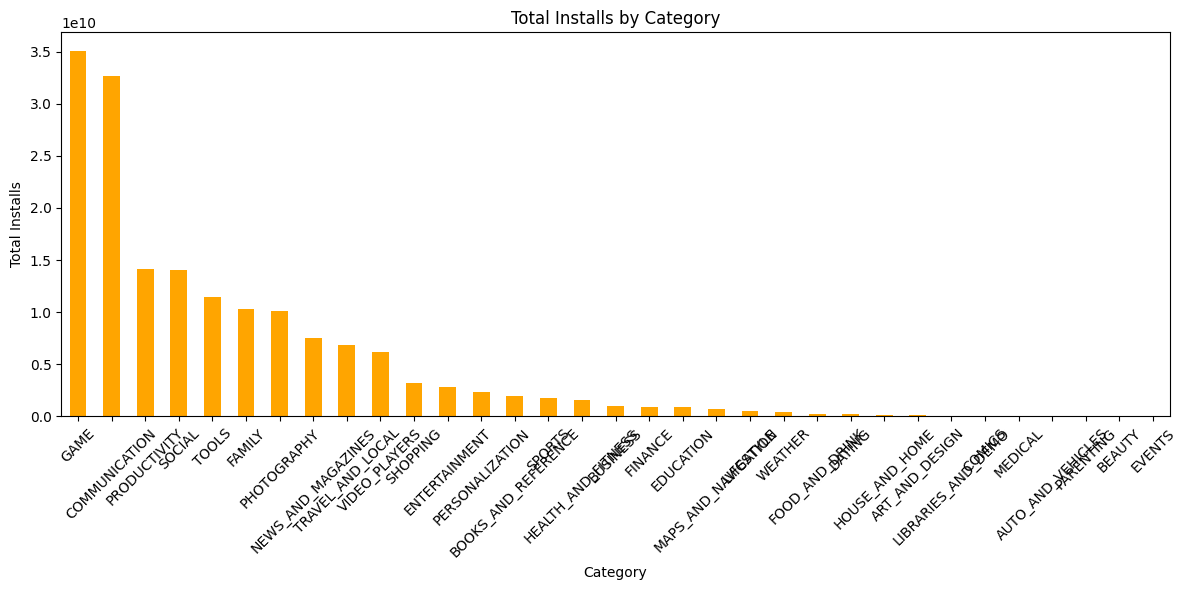

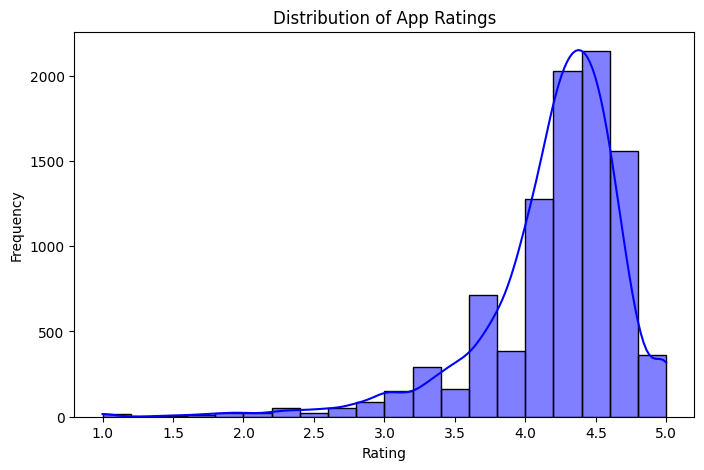

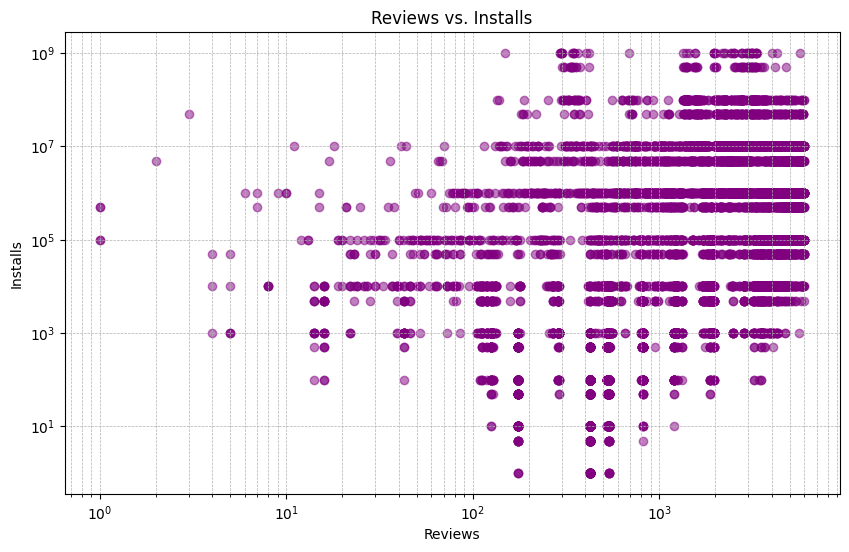

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '../data/googleplaystore.csv'
df = pd.read_csv(data_path)

# Preview the data
print("Dataset Preview:")
print(df.head())

# Check for missing values and data types
print("\nDataset Info:")
print(df.info())

# Generate summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check unique values in each column
print("\nUnique Value Counts:")
print(df.nunique())

# Clean the Installs column
# Remove rows with non-numeric values in the Installs column
df = df[df['Installs'].str.contains('^[0-9,]+\\+$', na=False)]  # Keep only rows with valid patterns
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Verify the cleaned Installs column
print("\nCleaned Installs Column:")
print(df[['Category', 'Installs']].head())

# Bar chart for installs by category
category_stats = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
category_stats.plot(kind='bar', color='orange')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add a histogram for Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Add a scatterplot for Reviews vs. Installs
plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['Installs'], alpha=0.5, color='purple')
plt.title('Reviews vs. Installs')
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()